In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
iris = load_iris()
X = iris.data

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# List of clustering algorithms to evaluate
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Hierarchical Clustering": AgglomerativeClustering(n_clusters=3, linkage='ward'),  # Ward linkage for hierarchical
    "BIRCH": Birch(n_clusters=3),
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42)
}

In [ ]:

# Dictionary to store evaluation metrics
metrics = {
    "Algorithm": [],
    "Silhouette Score": [],
    "Davies-Bouldin Index": [],
    "Calinski-Harabasz Score": []
}

In [ ]:

# Evaluate each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    if name == "Gaussian Mixture":
        labels = algorithm.fit_predict(X_scaled)
    else:
        labels = algorithm.fit_predict(X_scaled)

    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(X_scaled, labels)

    # Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(X_scaled, labels)

    # Store the metrics
    metrics["Algorithm"].append(name)
    metrics["Silhouette Score"].append(silhouette_avg)
    metrics["Davies-Bouldin Index"].append(db_index)
    metrics["Calinski-Harabasz Score"].append(ch_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Create a DataFrame with the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                  Algorithm  Silhouette Score  Davies-Bouldin Index  \
0                    KMeans          0.459948              0.833595   
1  Agglomerative Clustering          0.446689              0.803467   
2                    DBSCAN          0.356516              7.124057   
3   Hierarchical Clustering          0.446689              0.803467   
4                     BIRCH          0.453550              0.821830   
5          Gaussian Mixture          0.475143              0.886715   

   Calinski-Harabasz Score  
0               241.904402  
1               222.719164  
2                84.510330  
3               222.719164  
4               219.818769  
5               141.231476  


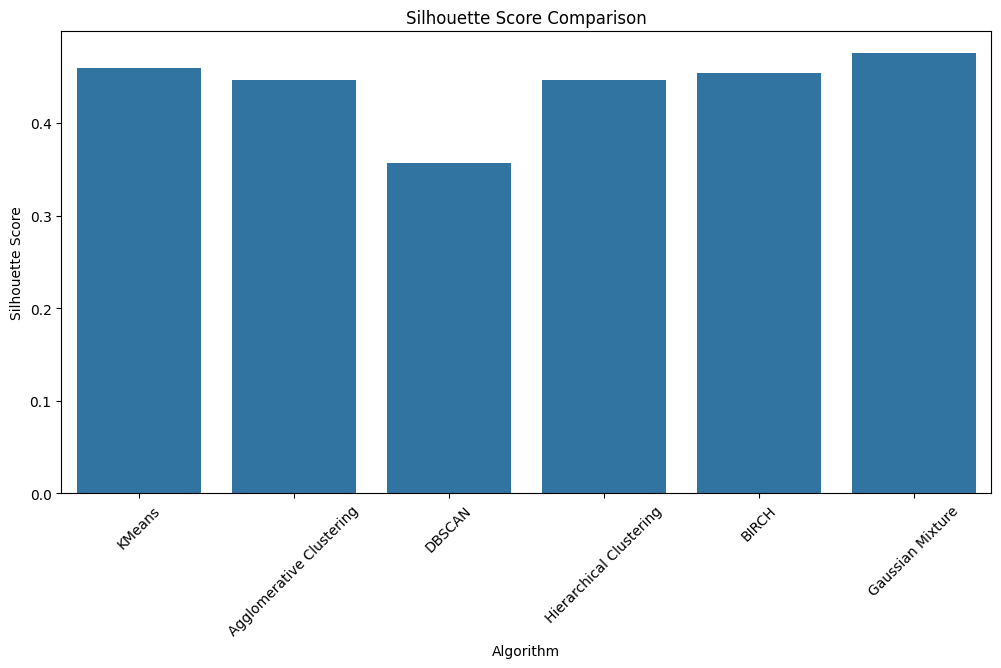

In [ ]:

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x="Algorithm", y="Silhouette Score", data=metrics_df)
plt.title("Silhouette Score Comparison")
plt.xticks(rotation=45)
plt.show()

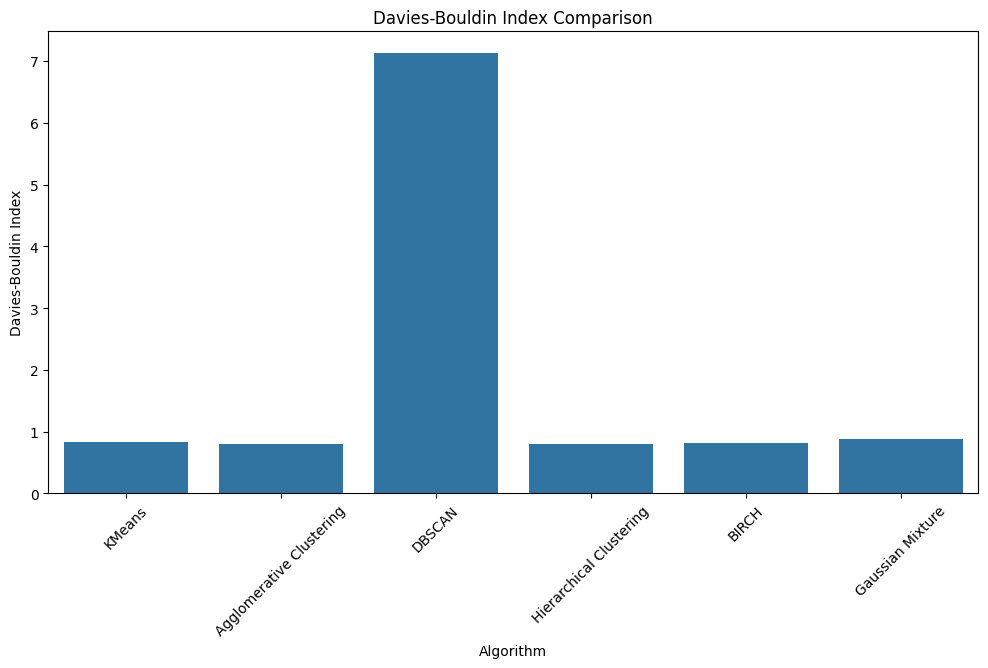

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Algorithm", y="Davies-Bouldin Index", data=metrics_df)
plt.title("Davies-Bouldin Index Comparison")
plt.xticks(rotation=45)
plt.show()

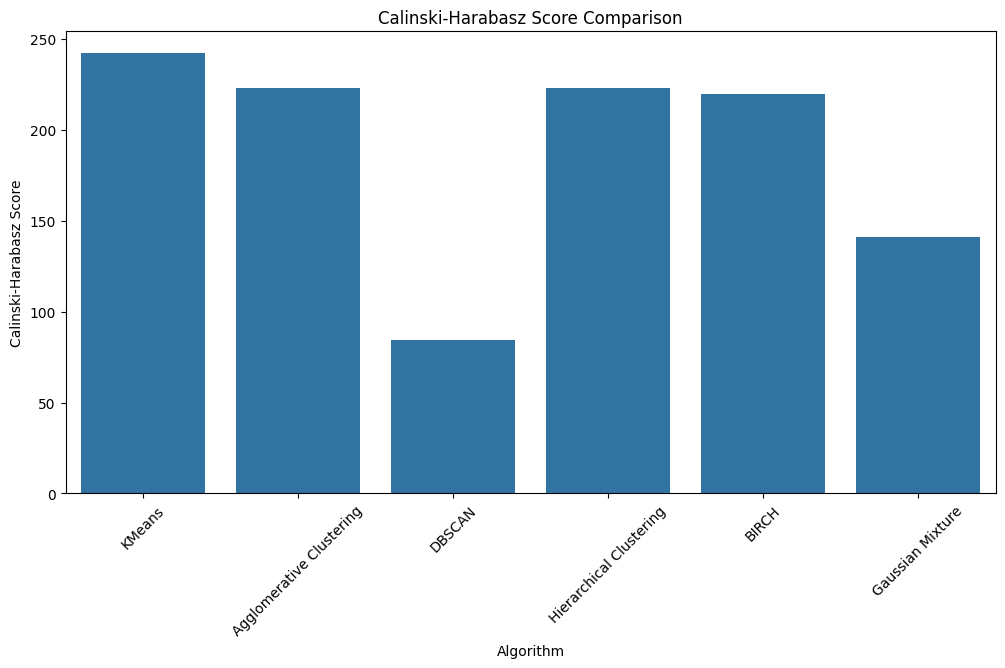

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Algorithm", y="Calinski-Harabasz Score", data=metrics_df)
plt.title("Calinski-Harabasz Score Comparison")
plt.xticks(rotation=45)
plt.show()